## **Introduction**
One of the most crucial steps in improving business performance is to identify opportunities and evaluate sales performance in order to establish an effective strategy. This can be accomplished through the analysis of sales data.

#### **Dataset Context** 
The dataset belongs to a French bakery in Guérande; it provides the daily transaction details of customers from (2021/01/01) to (2022/09/30).

#### **Objective** 
This analysis aims to better understand business performance by tracking historical sales data to gain valuable insight.

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
plt.style.use('fivethirtyeight')


df = pd.read_csv('/kaggle/input/french-bakery-daily-sales/Bakery sales.csv', index_col=0)
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


## Data Understanding

In [2]:
df.shape

(234005, 6)

In [3]:
df.dtypes

date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234005 entries, 0 to 511395
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           234005 non-null  object 
 1   time           234005 non-null  object 
 2   ticket_number  234005 non-null  float64
 3   article        234005 non-null  object 
 4   Quantity       234005 non-null  float64
 5   unit_price     234005 non-null  object 
dtypes: float64(2), object(4)
memory usage: 12.5+ MB


## Data Preparation

In [5]:
# Identifying any missing values
df.isna().sum()

date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [6]:
# Identifying duplicated data
df.duplicated().sum()

1210

In [7]:
# Drop duplicated data
df = df.drop_duplicates()
df.shape

(232795, 6)

In [8]:
# Rename the columns to more decent names.
df = df.rename(columns = {'date' : 'Date',
                         'time' : 'Time',
                          'ticket_number' : 'Transaction_id',
                          'article' : 'Menu',
                          'unit_price' : 'Price'})


# Convert 'Menu' value to title case.
df['Menu'] = df['Menu'].str.title()


# Fix 'Quantity' and 'Price' values.
df = df.replace(to_replace = {'Quantity' : {'.' : ' '}, # np.NaN
                              'Price' : {'€' : ' ' , ',' : '.' }}, regex=True)


# Convert 'Quantity', 'Price', 'Menu' and 'Transaction_id' types.
df = df.astype({'Quantity' : 'int', 
                'Price' : 'float', 
                'Transaction_id' : 'int',
                'Menu' : 'str'})

In [9]:
# Create 'Revenue' column, to find out bakery's income.
df['Revenue'] = df['Quantity'] * df['Price']

In [10]:
# Since date/time is not an object, thus we must change it first.
df['Date'] = pd.to_datetime(df['Date'])

# Breakdown 'Date' column into 'Week_day', 'Day', Month' and 'Year' column.
df['Week_day'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')

# Turn 'Week_day' column into names of the days and 'Month' column into names of the months.
df = df.replace(to_replace = {'Week_day' : {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',
                                            3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday',
                                            6 : 'Sunday'}}, regex=True)

df.head(1)

,Date,Time,Transaction_id,Menu,Quantity,Price,Revenue,Week_day,Day,Year,Month,Quarter
0,2021-01-02,08:38,150040,Baguette,1,0.9,0.9,Saturday,2,2021,2021-01,2021Q1


In [11]:
df.dtypes 

Date              datetime64[ns]
Time                      object
Transaction_id             int64
Menu                      object
Quantity                   int64
Price                    float64
Revenue                  float64
Week_day                  object
Day                        int64
Year                       int64
Month                  period[M]
Quarter            period[Q-DEC]
dtype: object

In [12]:
# Breakdown 'Time' column and turn it into day time
df['Day_time'] = pd.to_datetime(df['Time']).dt.hour
df['Day_time'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 17, 18, 19,  7, 16, 15, 20])

In [13]:
# Create function from hour to day time
def day_time (Day_time):
    if Day_time < 12:
        return 'Morning'
    elif Day_time < 17:
        return 'Afternoon'
    else:
        return 'Evening'
    
# Apply function to the new column    
df['Day_time'] = df.Day_time.apply(day_time)
df.head(1)

,Date,Time,Transaction_id,Menu,Quantity,Price,Revenue,Week_day,Day,Year,Month,Quarter,Day_time
0,2021-01-02,08:38,150040,Baguette,1,0.9,0.9,Saturday,2,2021,2021-01,2021Q1,Morning


In [14]:
# Sorting certain columns to see an overview of data from the smallest to the largest value
df.sort_values(by=['Menu', 'Quantity', 'Price', 'Revenue'])

,Date,Time,Transaction_id,Menu,Quantity,Price,Revenue,Week_day,Day,Year,Month,Quarter,Day_time
43541,2021-03-18,12:59,161853,.,1,0.0,0.0,Thursday,18,2021,2021-03,2021Q1,Afternoon
54650,2021-04-04,09:53,164878,.,1,0.0,0.0,Sunday,4,2021,2021-04,2021Q2,Morning
73667,2021-04-27,16:48,170079,.,1,0.0,0.0,Tuesday,27,2021,2021-04,2021Q2,Afternoon
33726,2021-03-04,12:32,159219,.,2,0.0,0.0,Thursday,4,2021,2021-03,2021Q1,Afternoon
135091,2021-07-10,13:25,186662,.,2,0.0,0.0,Saturday,10,2021,2021-07,2021Q3,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501877,2022-09-17,07:33,286289,Vik Bread,5,2.7,13.5,Saturday,17,2022,2022-09,2022Q3,Morning
510827,2022-09-30,09:55,288758,Vik Bread,5,2.7,13.5,Friday,30,2022,2022-09,2022Q3,Morning
139768,2021-07-14,08:51,187882,Vik Bread,6,2.5,15.0,Wednesday,14,2021,2021-07,2021Q3,Morning
116514,2021-06-19,18:28,181621,Vik Bread,10,2.5,25.0,Saturday,19,2021,2021-06,2021Q2,Evening


In the ‘Menu’ column above, there are dots (.) values and I also noticed zeros (0) values in ‘Price’. These values can lead to information bias and faulty interpretation. Hence, we need to remove these values.

In [15]:
# Drop '.' values and 0 values in 'Price'
df = df[~df['Menu'].isin(['.'])].reset_index(drop = True)
df = df[~df['Price'].isin([0])].reset_index(drop = True)
df.shape

(232763, 13)

## Identifying Extreme Values (Outliers)

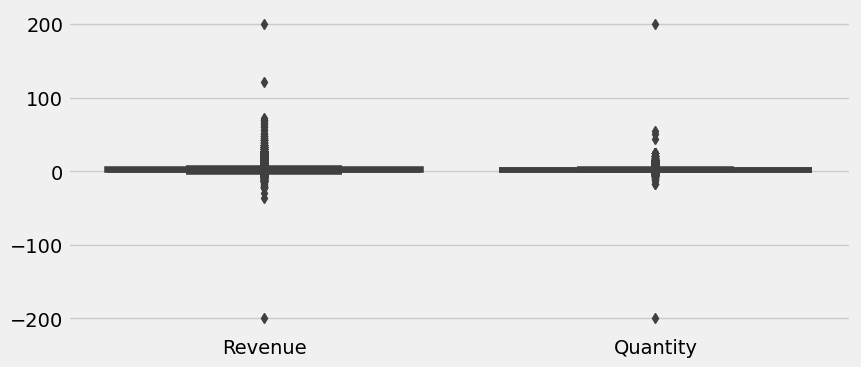

In [16]:
# Identifying outliers
plt.figure(figsize = (9, 4))
outlier = pd.DataFrame(data=df, columns = ['Revenue', 'Quantity'])
sns.boxplot(data=outlier)
plt.show()

- Based on the scatter plot above, there are two types of outliers; global outliers and contextual outliers:
1) In this case, the **global outlier** in ‘Revenue’ and ‘Quantity’ (≥100) might happen due to data entry errors. Thus its value is pretty far from the rest of the data.
2) For **contextual outlier**, as we can see, many sudden surges happened in the same condition for ‘Revenue’ and ‘Quantity’. In this case, this could happen due to special events like holidays, where many discounts or other promotions take place and increase the sales volume.

- Thus, I will drop the global outlier values that might be due to data entry errors while still keeping the contextual outliers.

> “Sometimes it’s best to keep outliers in your data. They can capture valuable information that is part of your study area. Retaining these points can be hard, particularly when it reduces statistical significance! However, excluding extreme values solely due to their extremeness can distort the results by removing information about the variability inherent in the study area. You’re forcing the subject area to appear less variable than it is in reality.” — Jim Fros


- All the zero values in ‘Revenue’ above (potentially) could happen due to promotion or discount strategy (e.g., holiday events/rewards for loyal customers/special offers for the first customers, etc.).

- I also notice there’s a negative value in ‘Quantity’. There’s a probability that this could happen due to data entry errors. In this case, the customer might have canceled or returned the menu. So, these negative values must be dropped from the ‘Quantity’ column.

In [17]:
# Drop negative values (df > 0) 
df = df.loc[~((df['Quantity'] <= 0) | (df['Revenue'] <= 0))].reset_index(drop = True)

# Drop global outliers
df = df.loc[~(df['Revenue'] >= 100)].reset_index(drop = True)
df = df.loc[~(df['Quantity'] >= 100)].reset_index(drop = True)
df.shape

(231478, 13)

## Exploratory Data Analysis

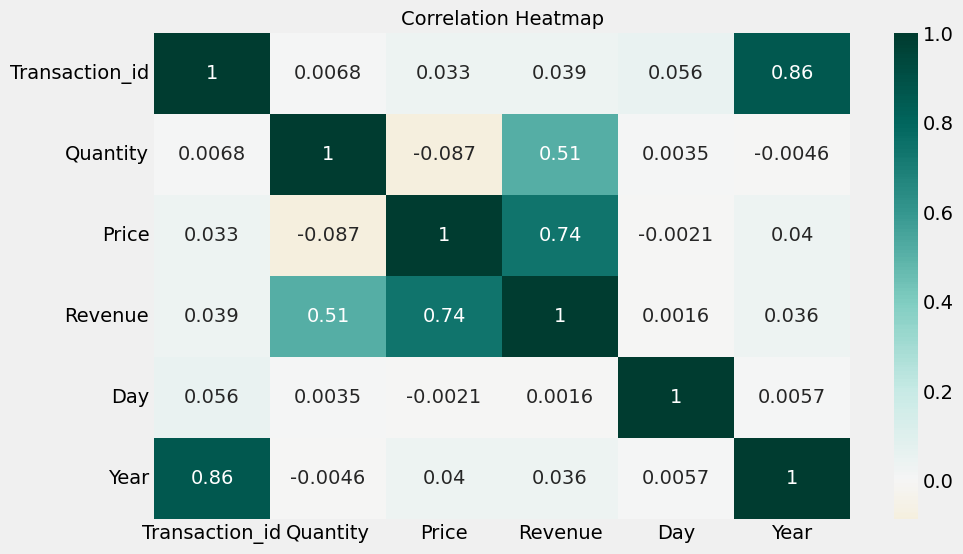

In [18]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

The correlation heatmap above shows the linear correlation between two variables, but the data doesn't necessarily imply a causal relationship (like Year and Transaction_id, those two variables don't have a casual relationship).
- Quantity and Revenue (0,51): Indicates a moderate correlation. When Quantity increases, Revenue also tends to increases.
- Price and Revenue (0,74): Indicates a strong correlation. When Price increases, Revenue also increases.
- Quantity and Price (-0,087: Indicate a poor/weak correlation. The two features are hardly related.

In [19]:
# Best Selling Menu Items
fig = px.treemap(data_frame=df, 
                path=[px.Constant('<b> Menu Items'), 
                      'Menu'], 
                title = '<b> Best Selling Menu Items (2021 & 2022)',
                values= 'Quantity')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')
 
fig.update_layout(treemapcolorway = ['burlywood', 'cadetblue'], 
                  margin = dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()


#  Most Profitable Menu Items
fig = px.treemap(data_frame=df, 
                path=[px.Constant('<b> Menu Items'), 
                      'Menu'], 
                title = '<b> Most Profitable Menu Items (2021 & 2022)',
                values='Revenue')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')
 
fig.update_layout(treemapcolorway = ['slateblue', 'peachpuff'], 
                  margin = dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()

- In the treemap above, you can classify the best-selling and most profitable menu item, as well as the least-selling menu item with low revenue. It’s essential to know your product information to unveil the advantages or disadvantages of a product to set what strategy needs to be taken.

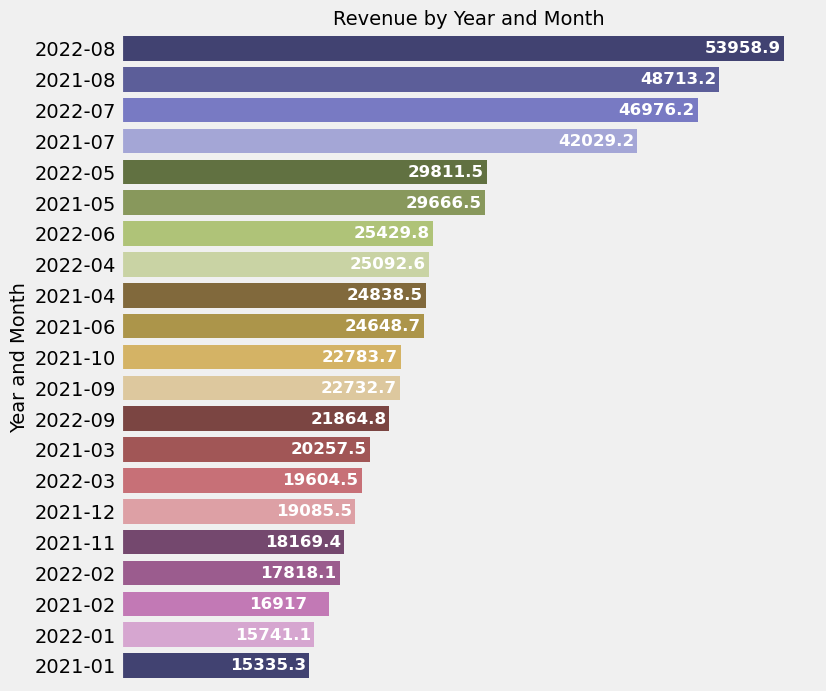

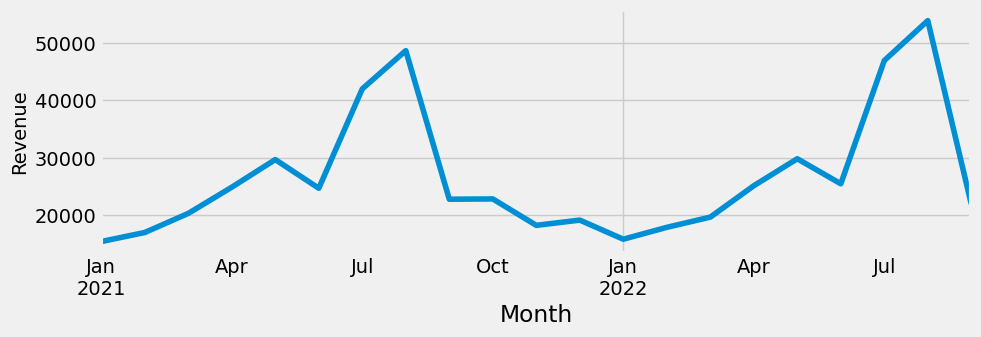

In [20]:
# Revenue by Month
rev_month = df.groupby(['Month'])['Revenue'].sum()\
                                            .reset_index()\
                                            .sort_values(by='Revenue', ascending=False)
fig = plt.figure(figsize = (8,8))
color = sns.color_palette('tab20b')
ax = sns.barplot(data=rev_month, x='Revenue', y='Month', palette=color, orient='h')

for i in ax.containers:
    ax.bar_label(i, padding=-57, color='white', 
             fontsize=12, label_type='edge',
            fontweight='bold')


plt.ylabel('Year and Month', size=14)
plt.title('Revenue by Year and Month', size=14)

ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
plt.show()


plt.figure(figsize = (10,3))
df.groupby(['Month'])['Revenue'].sum().plot()
plt.ylabel('Revenue', size=14)
plt.show()

- As we can see from the bar plot above, August and June are the highest months that generate revenue. It could happen due to the national celebrations day in France held in August and July.
- From September to January, the revenue decreased massively, and the pattern remains the same from the previous year in 2021. I assume there are external factors that have an impact on it. One of them could be the weather conditions/seasonal changes that affect customer activity and needs.

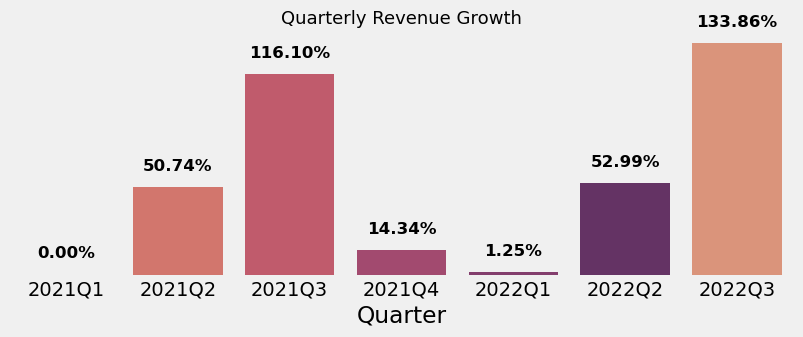

In [21]:
# Quarterly Revenue Growth
rev_quarter = df.groupby(df['Quarter'])['Revenue'].sum()
rev_growth = (rev_quarter / rev_quarter.iloc[0] - 1) * 100

fig = plt.figure(figsize=(9, 3))
color = sns.color_palette('flare')
ax = sns.barplot(data=rev_growth.reset_index(), x='Quarter', y='Revenue', palette=color)

for i in ax.containers:
    ax.bar_label(i, padding=10, color='black', fontsize=12, label_type='edge',
                 fontweight='bold', fmt='%.2f%%')

plt.title('Quarterly Revenue Growth', size=13)

ax.spines[['left', 'top', 'bottom']].set_visible(False)
ax.yaxis.set_visible(False)
# ax.xaxis.set_visible(False)

plt.show()

The definition says it within the name, quarterly revenue growth is the revenue growth of the current quarter revenue subtracted from the previous quarter. That’s why the 1st quarter has a value of 0% because there’s no previous value for comparing the growth. The quarterly revenue growth for Q1 and Q4 needs extra help to recover!

In [22]:
# Revenue by Day
profitable_menu = df.groupby('Week_day').sum(numeric_only=True)['Revenue'].sort_values(ascending=False)

fig = px.bar(profitable_menu, 
             color=profitable_menu, 
             color_continuous_scale=px.colors.sequential.YlGnBu)

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Revenue by Day (2021 & 2022)', title_x = 0.5, 
                  titlefont=dict(size=20), 
                  xaxis_tickangle=-0, 
                  yaxis = {'categoryorder':'total ascending'},
                  plot_bgcolor='white', 
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True, 
                 title='<b> Revenue')
fig.update_xaxes(title='<b> Day')
fig.update_traces(texttemplate='%{y}', 
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br>Revenue: %{y}')
fig.show()

Weekends were the most profitable, whereas weekdays generally had uniform revenue, except for Wednesdays.

In [23]:
# Most Purchased Items by Date
fig = px.treemap(data_frame=df, 
                path=[px.Constant('<b> Date in Each Year and Month'), 
                      'Month', 
                      'Day'], 
                title = '<b> Most Purchased Items by Date (2021 & 2022)',
                values='Quantity')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')
 
fig.update_layout(treemapcolorway = ['brown', 'coral'], 
                  margin = dict(t=70, b=10, l=20, r=20))

fig.layout.hovermode = False
fig.show()

The increase in sales volume in July and August might occur due to the celebration of two important French holidays. On the 14th of July, France commemorates Bastille Day, and on the 15th of August, the Assumption of Mary to Heaven is celebrated. These festivities likely contribute to the higher sales during these months.

In [24]:
# Day of time distribution
fig = px.scatter(df, x='Quantity', y='Time', color='Day_time')
fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Day of Time (2021 & 2022)', title_x = 0.5, 
                  titlefont=dict(size=20))
fig.show()

The busiest time for the bakery is usually in the morning, which is likely due to the fact that bakery products are a common choice for breakfast in France. So, customer demand tends to peak during these morning hours.

In [25]:
# Active Hour
busy_hour = df.groupby('Time').sum(numeric_only=True)['Transaction_id'].sort_values(ascending=False)

fig = px.bar(busy_hour, 
             color=busy_hour, 
             color_continuous_scale=px.colors.sequential.dense,
             orientation='h')

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Busiest Time (2021 & 2022)', title_x = 0.5, 
                  titlefont=dict(size=20), 
                  xaxis_tickangle=-0, 
                  yaxis = {'categoryorder':'total ascending'},
                  plot_bgcolor='white', 
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True, 
                 title='<b> Time')
fig.update_xaxes(title='<b> Transactions ID Per Customer')
fig.update_traces(texttemplate='%{x}', 
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br> Transaction : %{x}')
fig.show()

The Bakery’s busiest times were around 11 a.m., and the least busy times were around 2 p.m.

## Business Metrics

In [26]:
# ADS (Average Daily Sales) 2021
ads_2021 = df[(df['Quarter'] >= '2021Q1') & (df['Quarter'] <= '2021Q3')]\
            ['Revenue'].sum(numeric_only=True)/df['Date'].nunique()
print('ADS 2021:', '€', '%.2f' % ads_2021)

# ADS (Average Daily Sales) 2022
ads_2022 = df[(df['Quarter'] >= '2022Q1') & (df['Quarter'] <= '2022Q3')]\
            ['Revenue'].sum(numeric_only=True)/df['Date'].nunique()
print('ADS 2022:', '€', '%.2f' % ads_2022)


ADS 2021: € 408.56
ADS 2022: € 427.16


Average Daily Sales (ADS) is the average revenue earned in a day by dividing the total revenue by the number of days in that period. The ADS of the bakery in 2021 was € 408,56 per day and the ADS in 2022 was € 427,16 per day.

In [27]:
# ATV (Average Transaction Value) 2021
atv_2021 = df[(df['Quarter'] >= '2021Q1') & (df['Quarter'] <= '2021Q3')]\
            ['Revenue'].sum(numeric_only=True)/df['Transaction_id'].nunique()
print('ATV 2021:', '€', '%.2f' % atv_2021)

# ATV (Average Transaction Value) 2022
atv_2022 = df[(df['Quarter'] >= '2022Q1') & (df['Quarter'] <= '2022Q3')]\
            ['Revenue'].sum(numeric_only=True)/df['Transaction_id'].nunique()
print('ATV 2022:', '€', '%.2f' % atv_2022)

ATV 2021: € 1.81
ATV 2022: € 1.89


Average Transaction Value (ATV) is the average money spent in one transaction. The ATV of the bakery in 2021 was € 1,81 per transaction and the ATV in 2022 was € 1,89 per transaction.

In [28]:
# Revenue Growth 
rev_2021 = df[(df['Quarter'] >= '2021Q1') & (df['Quarter'] <= '2021Q3')]['Revenue'].sum(numeric_only=True)
rev_2022 = df[(df['Quarter'] >= '2022Q1') & (df['Quarter'] <= '2022Q3')]['Revenue'].sum(numeric_only=True)

revenue_growth = (rev_2022 - rev_2021)/rev_2021*100
print(f'Revenue Growth:', '%.2f' % revenue_growth,'%')

Revenue Growth: 4.55 %


Revenue growth is a measurement to see what percentage of the total revenue has increased or decreased compared to the previous year. In this case, the revenue growth rate of the bakery increased by 4,55%. 

## Insights

- Since there are significant celebrations almost every month, it would be great to implement bundled product promotions once a month. This can be done by pairing the best-selling menu items with the least-selling ones to increase the ATV and also bring more recognition to the underperforming menu items.
- Another strategy is to offer a special menu with a holiday season theme. For instance, during December, a menu that complements the winter theme could be introduced exclusively for that season. This approach can boost revenue growth during the quarter with historically lower earnings.
- To attract more customers on days with the lowest sales and revenue, offering discounts during specific hours can be effective. Consider conducting promotions on Tuesdays and Wednesdays in the afternoon, from 2 p.m. to 4 p.m., which typically have lower customer activity levels.

#### **References**:
[1] J. Frost. Guidelines for Removing and Handling Outliers in Data. (2019). Retrieved from: https://statisticsbyjim.com/basics/remove-outliers  <br/>
[2] M Gimbert. French Bakery Daily Sales. (2021). Retrieved from: https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales   <br/>
[3] I. Cohen. Outlier Detection and Analysis: The Different Types of Outliers. (2019). Retrieved from: https://www.anodot.com/blog/quick-guide-different-types-outliers

If you have any questions or suggestions please don’t hesitate to share them with me. Your suggestions are highly valued!